# Exploratory Data Analysis for Humpback Whale Videos gathered from YouTube (v3 Data API)
- Using Humpback Whales collection from MongoDB 
- it would be interesting to see the distribution of users/channels across truly relevant, wild encounters - since given a user and what we know about their content, we could assign larger weights to predict how relevant/ likely a video is to contain a true, wild encounter

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
hw_data = pd.read_csv("humpback whales.csv")

In [4]:
pd.set_option('display.max_columns', None)
hw_data.head()

,_id,channelId,description.eng,description.original,dislikeCount,duration,encounter.dates,encounter.locationIDs,fileDetails,likeCount,newLocation,publishedAt,recordingDetails.date,recordingDetails.location,regionRestriction,relevant,tags.eng,tags.original,title.eng,title.original,uploadedAt,url,user_country,videoID,viewCount,wild
0,8j1HWD8KuMM,NaN,NaN,Tom Mustill - Humpback Whales - A Detective St...,0.0,NaN,[],[],NaN,1.0,0,2019-05-05T21:17:14.000Z,NaN,NaN,NaN,True,[],"[""auto-upload""]",NaN,Tom Mustill - Humpback Whales - A Detective St...,NaN,https://youtu.be/8j1HWD8KuMM,NaN,8j1HWD8KuMM,170,true
1,tW_T8Z6ebmg,NaN,NaN,"Humpback whale calf suckling its mother, first...",3.0,NaN,[],[],NaN,166.0,0,2018-10-15T08:32:31.000Z,NaN,NaN,NaN,True,[],"[""humpback whale"",""suckling behaviour"",""Madaga...",NaN,Suckling Humpback whale,NaN,https://youtu.be/tW_T8Z6ebmg,NaN,tW_T8Z6ebmg,36383,true
2,oSGhnD5kmAg,NaN,NaN,To use this video in a commercial player or br...,1.0,NaN,[],[],NaN,16.0,0,2019-03-07T09:39:33.000Z,NaN,NaN,NaN,True,[],"[""storyful"",""news"",""viral"",""Humpback Whale"",""W...",NaN,Humpback Whales Lunge Feed Among Pod of Dolphi...,NaN,https://youtu.be/oSGhnD5kmAg,NaN,oSGhnD5kmAg,1016,true
3,6eWwFNq4i_c,NaN,NaN,The best moments of the 2017 humpback whale se...,0.0,NaN,[],[],NaN,15.0,0,2017-09-29T06:42:30.000Z,NaN,NaN,NaN,True,[],"[""Whales"",""Swim with whales"",""Wildlife"",""Snork...",NaN,Humpback whales 2017 - Best of by Moorea Ocean...,NaN,https://youtu.be/6eWwFNq4i_c,NaN,6eWwFNq4i_c,2088,true
4,RMaMmynj76s,NaN,NaN,A large group of Humpback Whales lunge feeding...,87.0,NaN,[],[],NaN,1286.0,0,2015-09-17T15:29:19.000Z,NaN,NaN,NaN,True,[],"[""Humpback Whale (Organism Classification)"",""s...",NaN,Amazing! Humpback Whales Lunge Feeding up clos...,NaN,https://youtu.be/RMaMmynj76s,NaN,RMaMmynj76s,377651,true


In [73]:
#channelId, description.eng, duration, encounter.dates, encounter.locationIDs, fileDetails, recordingDetails.date, recordingDetails.location, regionRestriction, tags.eng, title.eng, uploadedAt
drop_columns = ['_id', 'description.eng', 'duration', 'encounter.dates', 'encounter.locationIDs', 
           'fileDetails', 'recordingDetails.date', 'recordingDetails.location', 'regionRestriction', 
           'tags.eng', 'title.eng', 'uploadedAt']
hw_data.drop(columns = drop_columns, inplace = True)

In [72]:
hw_data.head()

,channelId,description.original,dislikeCount,likeCount,newLocation,publishedAt,relevant,tags.original,title.original,url,user_country,videoID,viewCount,wild
0,NaN,Tom Mustill - Humpback Whales - A Detective St...,0.0,1.0,0,2019-05-05T21:17:14.000Z,True,"[""auto-upload""]",Tom Mustill - Humpback Whales - A Detective St...,https://youtu.be/8j1HWD8KuMM,NaN,8j1HWD8KuMM,170,true
1,NaN,"Humpback whale calf suckling its mother, first...",3.0,166.0,0,2018-10-15T08:32:31.000Z,True,"[""humpback whale"",""suckling behaviour"",""Madaga...",Suckling Humpback whale,https://youtu.be/tW_T8Z6ebmg,NaN,tW_T8Z6ebmg,36383,true
2,NaN,To use this video in a commercial player or br...,1.0,16.0,0,2019-03-07T09:39:33.000Z,True,"[""storyful"",""news"",""viral"",""Humpback Whale"",""W...",Humpback Whales Lunge Feed Among Pod of Dolphi...,https://youtu.be/oSGhnD5kmAg,NaN,oSGhnD5kmAg,1016,true
3,NaN,The best moments of the 2017 humpback whale se...,0.0,15.0,0,2017-09-29T06:42:30.000Z,True,"[""Whales"",""Swim with whales"",""Wildlife"",""Snork...",Humpback whales 2017 - Best of by Moorea Ocean...,https://youtu.be/6eWwFNq4i_c,NaN,6eWwFNq4i_c,2088,true
4,NaN,A large group of Humpback Whales lunge feeding...,87.0,1286.0,0,2015-09-17T15:29:19.000Z,True,"[""Humpback Whale (Organism Classification)"",""s...",Amazing! Humpback Whales Lunge Feeding up clos...,https://youtu.be/RMaMmynj76s,NaN,RMaMmynj76s,377651,true


In [74]:
hw_data.shape

(1585, 14)

In [75]:
hw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   channelId             729 non-null    object 
 1   description.original  1511 non-null   object 
 2   dislikeCount          1557 non-null   float64
 3   likeCount             1557 non-null   float64
 4   newLocation           1506 non-null   object 
 5   publishedAt           1585 non-null   object 
 6   relevant              1585 non-null   bool   
 7   tags.original         1585 non-null   object 
 8   title.original        1585 non-null   object 
 9   url                   1585 non-null   object 
 10  user_country          205 non-null    object 
 11  videoID               1585 non-null   object 
 12  viewCount             1585 non-null   int64  
 13  wild                  1585 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 162.6+ KB


In [76]:
hw_data.describe()

,dislikeCount,likeCount,viewCount
count,1557.000000,1557.000000,1.585000e+03
mean,8.913295,170.208735,2.857619e+04
std,73.977708,1181.239439,1.930986e+05
min,0.000000,0.000000,0.000000e+00
25%,0.000000,3.000000,1.990000e+02
50%,0.000000,9.000000,8.360000e+02
75%,1.000000,31.000000,4.151000e+03
max,2290.000000,33888.000000,4.082075e+06


## Categorical Analysis

### 1. Relevant vs Not Relevant Videos

True     859
False    726
Name: relevant, dtype: int64


<AxesSubplot:title={'center':'Relevant/Not Relevant Counts'}>

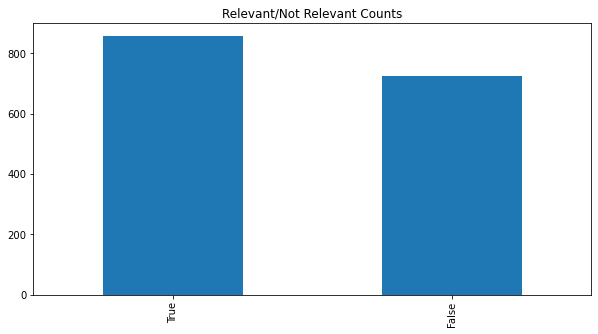

In [5]:
# plot relevant vs not relevant
plt.figure(figsize=(10,5))
print(hw_data['relevant'].value_counts())
hw_data['relevant'].value_counts().plot(kind = 'bar', title = 'Relevant/Not Relevant Counts')

### 2. Wild vs Not Wild (Same as Relevant vs Not Relevant)

true    859
0       726
Name: wild, dtype: int64


<AxesSubplot:title={'center':'Wild/Captive Counts for Relevant Documents'}>

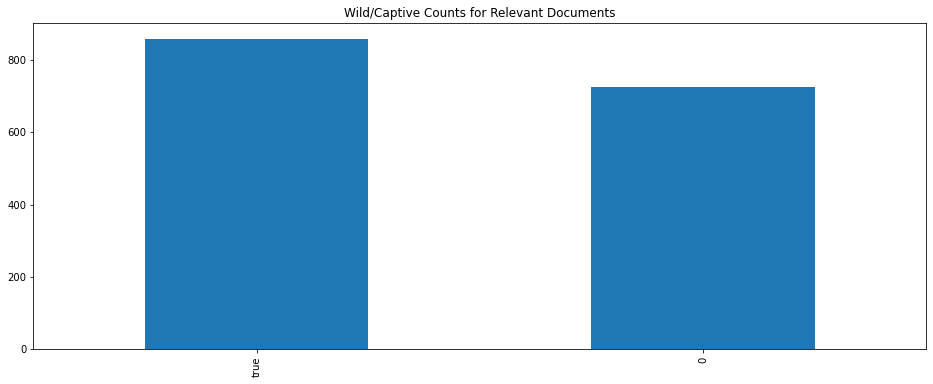

In [27]:
# plot wild vs not wild
plt.figure(figsize=(16,6))
print(hw_data['wild'].value_counts())
hw_data['wild'].value_counts().plot(kind = 'bar', title = 'Wild/Captive Counts for Relevant Documents')

For humpback whales, all entries that are relevant (True) are by default wild (no humpback whales in captivity)

### 3. Location EDA

#### Counts of Videos with Location vs Counts of Videos with No Location

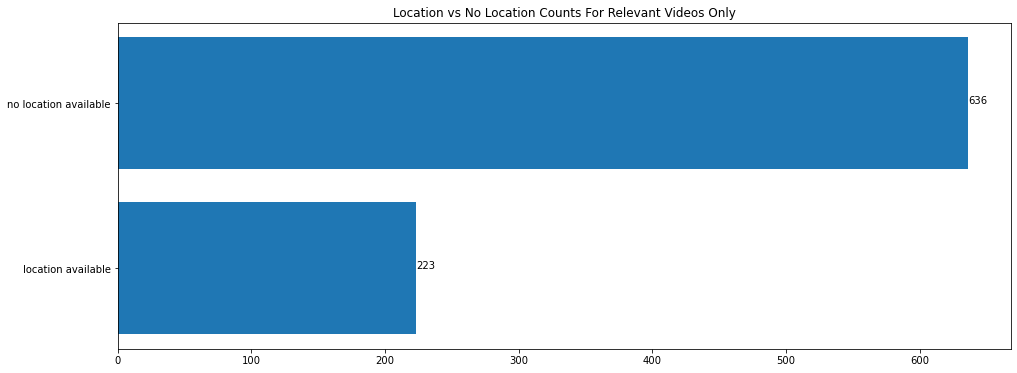

In [77]:
# plot num of entries that have locations (newLocation != 0) for relevant documents only
plt.figure(figsize=(16,6))
# print(hw_data['newLocation'].str.lower().value_counts())

loc_count = len(hw_data[(hw_data['newLocation'] != '0') & (hw_data['relevant'] == True)])
no_loc_count = len(hw_data[(hw_data['newLocation'] == '0') & (hw_data['relevant'] == True)])

location_counts = {'location available': loc_count,
                   'no location available': no_loc_count
                  }

plt.barh(list(location_counts.keys()), list(location_counts.values()))
plt.title("Location vs No Location Counts For Relevant Videos Only")

# Text on the top of each bar
y = list(location_counts.values())
for index, value in enumerate(y):
    plt.text(value, index, str(value))
    
plt.show()

## Text Analysis Functions

TODO: redo text analysis in terms of relevant vs non-relevant videos

In [164]:
import numpy as np
import re
import seaborn as sns
import string
import nltk
import warnings
from collections import Counter

from nltk import PorterStemmer

np.random.seed(1)

# function to remove a pattern from our text
def remove_pattern(text, pattern):
    r = re.findall(pattern, str(text))
    
    for i in r:
        text = re.sub(i, "", text)
    
    return text

# function to count freq of each word
# documents should be a list of strings
def count_frequency(documents):
    # Step 1: covert all strings into their lower case form
    lower_case_doc = []
    for s in documents:
        lower_case_doc.append(s.lower())
    
    # Step 2: remove all punctuations
    no_punc_doc = []
    for s in lower_case_doc:
        no_punc_doc.append(s.translate(str.maketrans('', '', string.punctuation)))
    
    # Step 3: tokenize a sentence, i.e., split a sentence into individual words 
    words_doc = []
    for s in no_punc_doc:
        words_doc.append(s.split())
    
    # Step 4: count frequencies
    all_words = []
    for s in words_doc:
        all_words.extend(s) 
    frequency =  Counter(all_words)

    return frequency

def do_text_analysis(df, column, len_short=4):
    # execute remove pattern
    df[column] = np.vectorize(remove_pattern)(df[column], "@:[\w]*")

    # remove punctuation, special chars, and numbers
    df[column] = df[column].str.replace("[^a-zA-Z]", " ") #only keep letters a-z and A-Z
    
    #remove short words
    df[column] = df[column].apply(lambda x: ' '.join([w for w in x.split() if len(w) > len_short]))

    # tokenization
    tokenized_sentences = df[column].apply(lambda x: x.split())

    # stemming
    ps = PorterStemmer()
    tokenized_sentences = tokenized_sentences.apply(lambda x: [ps.stem(i) for i in x])

    # stitch tokens back together
    for i in range(len(tokenized_sentences)):
        tokenized_sentences[i] = ' '.join(tokenized_sentences[i])
    df[column + ' clean'] = tokenized_sentences


    # gather freq's
    documents = [x for x in df[column + ' clean']]
    freq_dict = count_frequency(documents)
    freq_df = pd.DataFrame({column + ' word': list(freq_dict.keys()),
                           column + ' word freq': list(freq_dict.values())})

    # visualize freq's
    sns.set(rc={'figure.figsize':(16,10)})
    freq_df_plot = freq_df.nlargest(20,columns = column + ' word freq')
    sns.barplot(data=freq_df_plot, y = column + ' word',x = column + ' word freq').set(title = 'Most Frequent Words in ' + column)
    sns.despine()
    
    return df

In [170]:
hw_data[(hw_data['newLocation'] == 'San Diego')]['newLocation']

608    San Diego
855    San Diego
911    San Diego
Name: newLocation, dtype: object

In [146]:
text_analysis_df = hw_data.copy(deep=True)

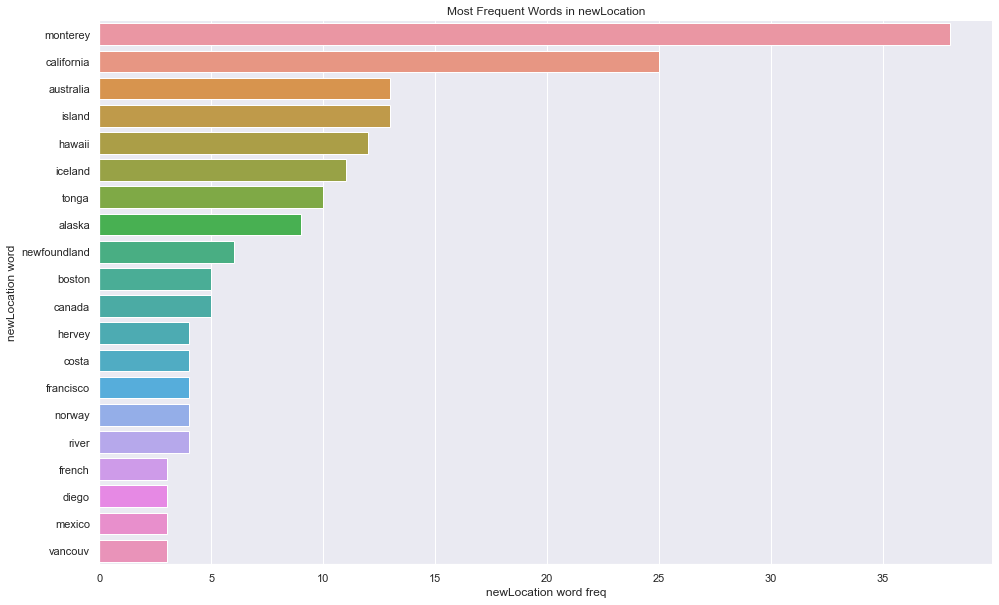

In [165]:
# do a text analysis (remove punctuation, move to lower case to find out most frequent locations)
text_analysis_df = do_text_analysis(text_analysis_df, 'newLocation', 2)

In [144]:
hw_data.drop(columns = ['description.original clean'], inplace = True)
hw_data.head()

,channelId,description.original,dislikeCount,likeCount,newLocation,publishedAt,relevant,tags.original,title.original,url,user_country,videoID,viewCount,wild
0,NaN,Mustill Humpback Whales Detective Story trailer,0.0,1.0,0,2019-05-05T21:17:14.000Z,True,"[""auto-upload""]",Tom Mustill - Humpback Whales - A Detective St...,https://youtu.be/8j1HWD8KuMM,NaN,8j1HWD8KuMM,170,true
1,NaN,Humpback whale suckling mother first tamada Fo...,3.0,166.0,0,2018-10-15T08:32:31.000Z,True,"[""humpback whale"",""suckling behaviour"",""Madaga...",Suckling Humpback whale,https://youtu.be/tW_T8Z6ebmg,NaN,tW_T8Z6ebmg,36383,true
2,NaN,video commercial player broadcast contact lice...,1.0,16.0,0,2019-03-07T09:39:33.000Z,True,"[""storyful"",""news"",""viral"",""Humpback Whale"",""W...",Humpback Whales Lunge Feed Among Pod of Dolphi...,https://youtu.be/oSGhnD5kmAg,NaN,oSGhnD5kmAg,1016,true
3,NaN,moments humpback whale season Moorea Ocean Adv...,0.0,15.0,0,2017-09-29T06:42:30.000Z,True,"[""Whales"",""Swim with whales"",""Wildlife"",""Snork...",Humpback whales 2017 - Best of by Moorea Ocean...,https://youtu.be/6eWwFNq4i_c,NaN,6eWwFNq4i_c,2088,true
4,NaN,large group Humpback Whales lunge feeding Aboa...,87.0,1286.0,0,2015-09-17T15:29:19.000Z,True,"[""Humpback Whale (Organism Classification)"",""s...",Amazing! Humpback Whales Lunge Feeding up clos...,https://youtu.be/RMaMmynj76s,NaN,RMaMmynj76s,377651,true


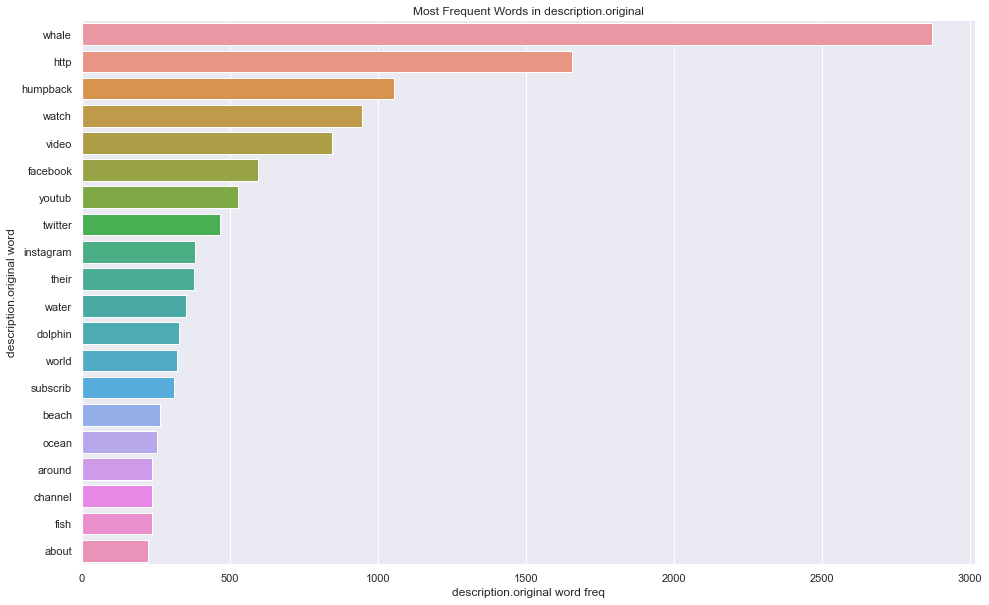

In [147]:
# text analysis - top keywords in description.original
text_analysis_df = do_text_analysis(text_analysis_df, 'description.original')

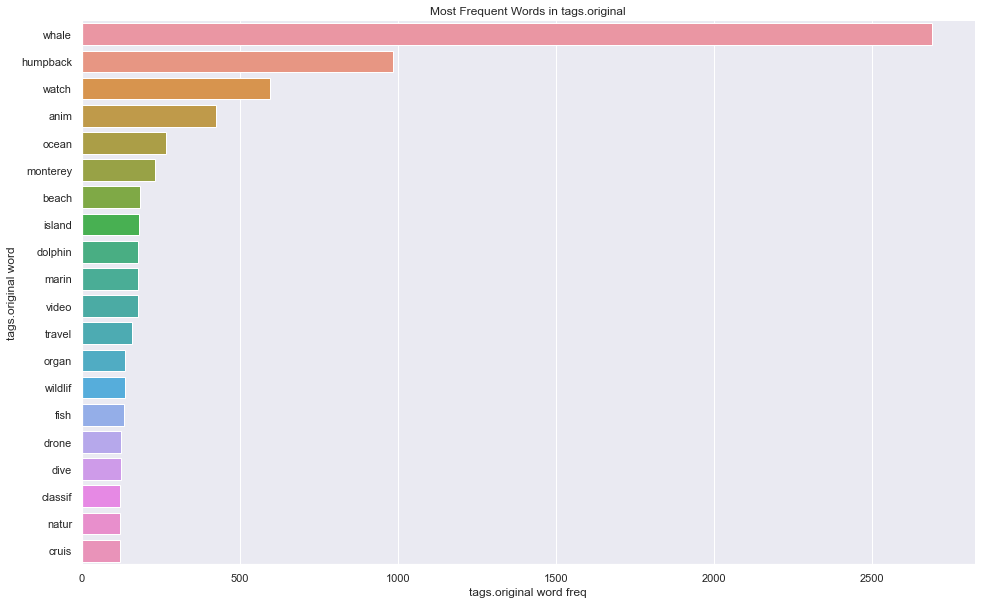

In [150]:
# text analysis - tags.original
text_analysis_df = do_text_analysis(text_analysis_df, 'tags.original')

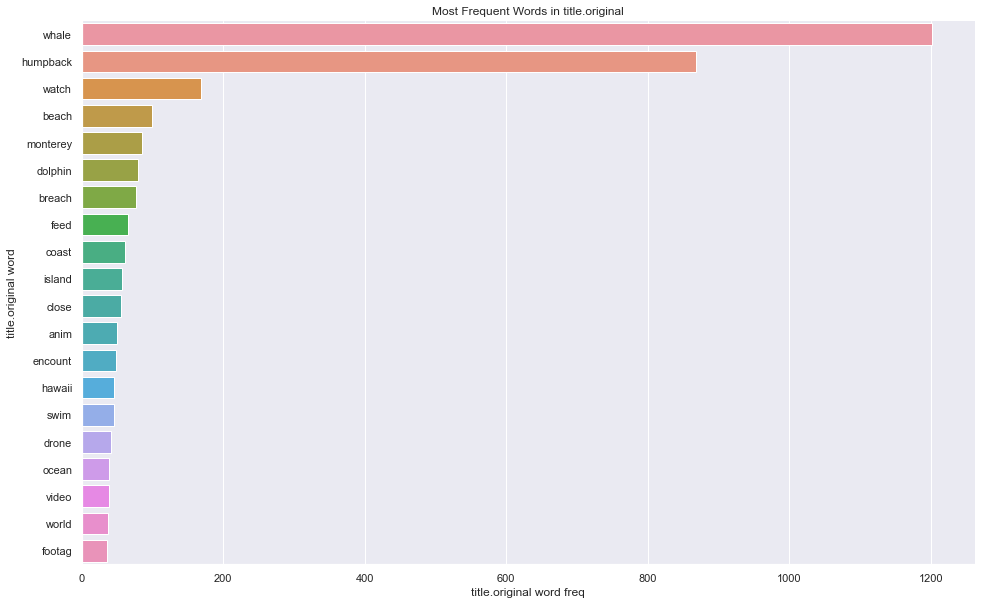

In [151]:
# text analysis - title.original
text_analysis_df = do_text_analysis(text_analysis_df, 'title.original')

In [148]:
text_analysis_df.head()

,channelId,description.original,dislikeCount,likeCount,newLocation,publishedAt,relevant,tags.original,title.original,url,user_country,videoID,viewCount,wild,description.original clean
0,NaN,Mustill Humpback Whales Detective Story trailer,0.0,1.0,0,2019-05-05T21:17:14.000Z,True,"[""auto-upload""]",Tom Mustill - Humpback Whales - A Detective St...,https://youtu.be/8j1HWD8KuMM,NaN,8j1HWD8KuMM,170,true,mustil humpback whale detect stori trailer
1,NaN,Humpback whale suckling mother first tamada Fo...,3.0,166.0,0,2018-10-15T08:32:31.000Z,True,"[""humpback whale"",""suckling behaviour"",""Madaga...",Suckling Humpback whale,https://youtu.be/tW_T8Z6ebmg,NaN,tW_T8Z6ebmg,36383,true,humpback whale suckl mother first tamada foota...
2,NaN,video commercial player broadcast contact lice...,1.0,16.0,0,2019-03-07T09:39:33.000Z,True,"[""storyful"",""news"",""viral"",""Humpback Whale"",""W...",Humpback Whales Lunge Feed Among Pod of Dolphi...,https://youtu.be/oSGhnD5kmAg,NaN,oSGhnD5kmAg,1016,true,video commerci player broadcast contact licens...
3,NaN,moments humpback whale season Moorea Ocean Adv...,0.0,15.0,0,2017-09-29T06:42:30.000Z,True,"[""Whales"",""Swim with whales"",""Wildlife"",""Snork...",Humpback whales 2017 - Best of by Moorea Ocean...,https://youtu.be/6eWwFNq4i_c,NaN,6eWwFNq4i_c,2088,true,moment humpback whale season moorea ocean adve...
4,NaN,large group Humpback Whales lunge feeding Aboa...,87.0,1286.0,0,2015-09-17T15:29:19.000Z,True,"[""Humpback Whale (Organism Classification)"",""s...",Amazing! Humpback Whales Lunge Feeding up clos...,https://youtu.be/RMaMmynj76s,NaN,RMaMmynj76s,377651,true,larg group humpback whale lung feed aboard gre...


In [155]:
# extract months from publishedAt and plot histogram of posts per month (relevant vs not relevant)
import datetime as dt

hw_data['month'] = pd.to_datetime(hw_data['publishedAt'])
hw_data['month'] = hw_data['month'].dt.strftime('%b')

hw_data.head()

,channelId,description.original,dislikeCount,likeCount,newLocation,publishedAt,relevant,tags.original,title.original,url,user_country,videoID,viewCount,wild,month
0,NaN,Mustill Humpback Whales Detective Story trailer,0.0,1.0,0,2019-05-05T21:17:14.000Z,True,"[""auto-upload""]",Tom Mustill - Humpback Whales - A Detective St...,https://youtu.be/8j1HWD8KuMM,NaN,8j1HWD8KuMM,170,true,May
1,NaN,Humpback whale suckling mother first tamada Fo...,3.0,166.0,0,2018-10-15T08:32:31.000Z,True,"[""humpback whale"",""suckling behaviour"",""Madaga...",Suckling Humpback whale,https://youtu.be/tW_T8Z6ebmg,NaN,tW_T8Z6ebmg,36383,true,Oct
2,NaN,video commercial player broadcast contact lice...,1.0,16.0,0,2019-03-07T09:39:33.000Z,True,"[""storyful"",""news"",""viral"",""Humpback Whale"",""W...",Humpback Whales Lunge Feed Among Pod of Dolphi...,https://youtu.be/oSGhnD5kmAg,NaN,oSGhnD5kmAg,1016,true,Mar
3,NaN,moments humpback whale season Moorea Ocean Adv...,0.0,15.0,0,2017-09-29T06:42:30.000Z,True,"[""Whales"",""Swim with whales"",""Wildlife"",""Snork...",Humpback whales 2017 - Best of by Moorea Ocean...,https://youtu.be/6eWwFNq4i_c,NaN,6eWwFNq4i_c,2088,true,Sep
4,NaN,large group Humpback Whales lunge feeding Aboa...,87.0,1286.0,0,2015-09-17T15:29:19.000Z,True,"[""Humpback Whale (Organism Classification)"",""s...",Amazing! Humpback Whales Lunge Feeding up clos...,https://youtu.be/RMaMmynj76s,NaN,RMaMmynj76s,377651,true,Sep


Apr    113
Aug    223
Dec     87
Feb    138
Jan    113
Jul    202
Jun    113
Mar    133
May     84
Nov    119
Oct    126
Sep    134
Name: month, dtype: int64


<AxesSubplot:>

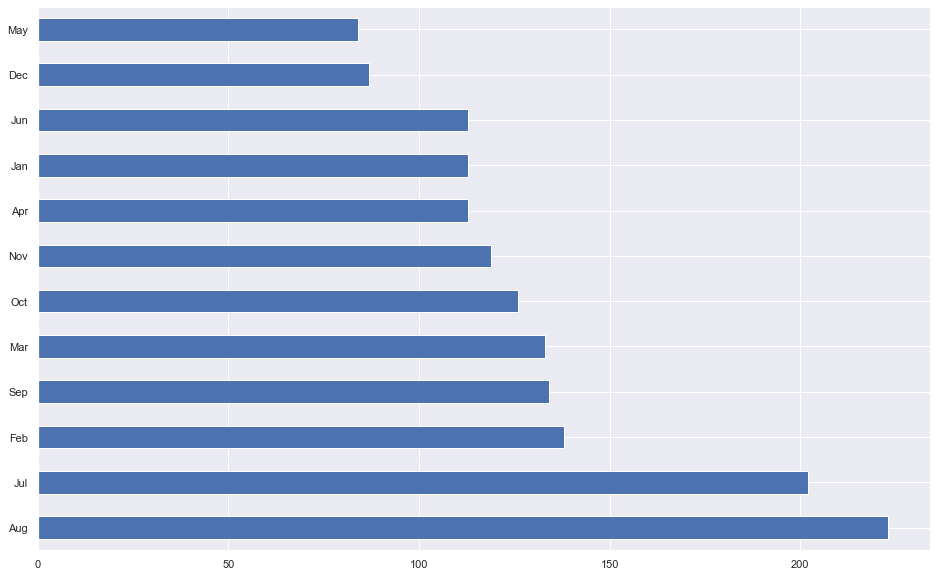

In [162]:
print(hw_data['month'].value_counts().sort_index())
hw_data['month'].value_counts().plot(kind='barh')

## Numerical Analysis

In [107]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

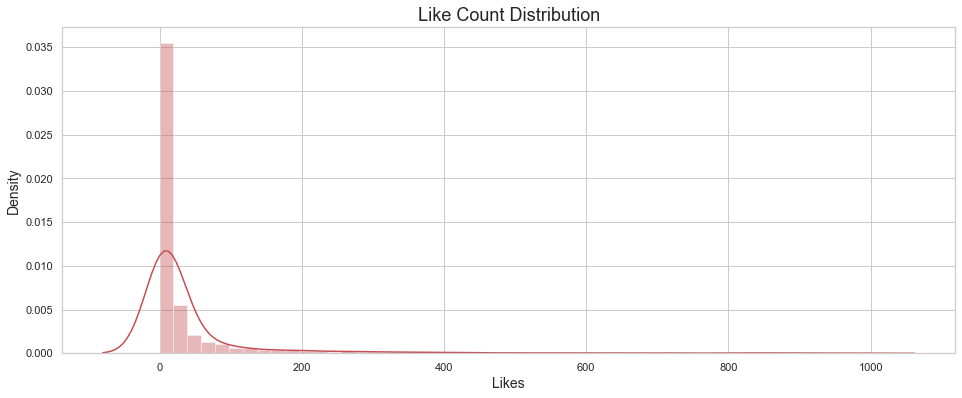

In [110]:
# likeCount - visualize distribution or use a histogram to plot counts into bins
plt.figure(figsize=(16,6))
sns.distplot(hw_data[(hw_data['likeCount'] <= 1000)]['likeCount'],color='r')
plt.title('Like Count Distribution',size=18)
plt.xlabel('Likes',size=14)
plt.ylabel('Density',size=14)
plt.show()

In [112]:
hw_data['likeCount'].value_counts().sort_index()

0.0        136
1.0        130
2.0        106
3.0        107
4.0         68
          ... 
7914.0       1
9913.0       1
12178.0      1
18129.0      1
33888.0      1
Name: likeCount, Length: 282, dtype: int64

In [87]:
hw_data['likeCount'].max()

33888.0

<AxesSubplot:xlabel='likeCount'>

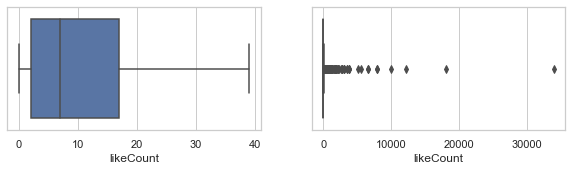

In [126]:
#likeCount Boxplots
number_of_columns = 2
number_of_rows = 1

plt.figure(figsize=(5*number_of_columns,5*number_of_rows))
plt.subplot(number_of_rows + 1,number_of_columns,1)
sns.set_theme(style = 'whitegrid')
sns.boxplot(x = hw_data[(hw_data['likeCount'] <= 100)]['likeCount'], showfliers=False)

plt.subplot(number_of_rows + 1,number_of_columns,2)
sns.set_theme(style = 'whitegrid')
sns.boxplot(x = hw_data['likeCount'], showfliers=True)

<AxesSubplot:xlabel='dislikeCount'>

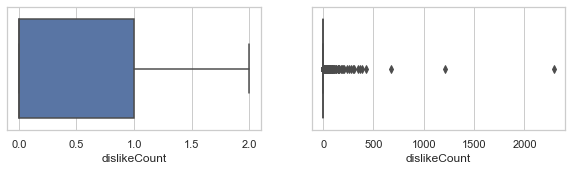

In [128]:
#dislikeCount Boxplots
number_of_columns = 2
number_of_rows = 1

plt.figure(figsize=(5*number_of_columns,5*number_of_rows))
plt.subplot(number_of_rows + 1,number_of_columns,1)
sns.set_theme(style = 'whitegrid')
sns.boxplot(x = hw_data[(hw_data['dislikeCount'] <= 100)]['dislikeCount'], showfliers=False)

plt.subplot(number_of_rows + 1,number_of_columns,2)
sns.set_theme(style = 'whitegrid')
sns.boxplot(x = hw_data['dislikeCount'], showfliers=True)

<AxesSubplot:xlabel='viewCount'>

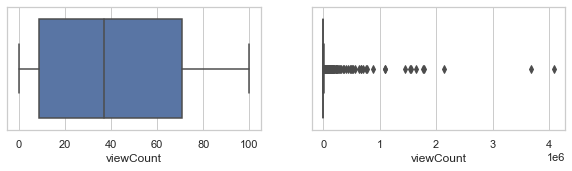

In [127]:
# viewCount Boxplots
number_of_columns = 2
number_of_rows = 1

plt.figure(figsize=(5*number_of_columns,5*number_of_rows))
plt.subplot(number_of_rows + 1,number_of_columns,1)
sns.set_theme(style = 'whitegrid')
sns.boxplot(x = hw_data[(hw_data['viewCount'] <= 100)]['viewCount'], showfliers=False)

plt.subplot(number_of_rows + 1,number_of_columns,2)
sns.set_theme(style = 'whitegrid')
sns.boxplot(x = hw_data['viewCount'], showfliers=True)

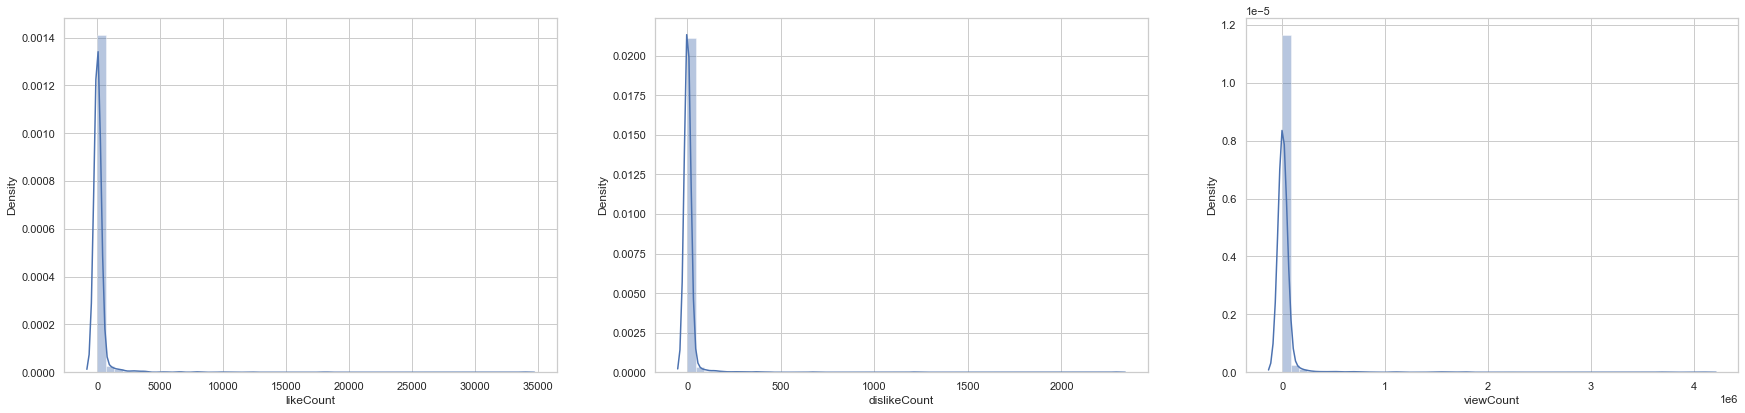

In [117]:
# checking distribution skewness for likeCount, dislikeCount and viewCount
number_of_columns = 3
number_of_rows = 3
l = ['likeCount', 'dislikeCount', 'viewCount']
plt.figure(figsize=(10*number_of_columns,10*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(hw_data[l[i]],kde=True) 

#### Correlation b/w variables

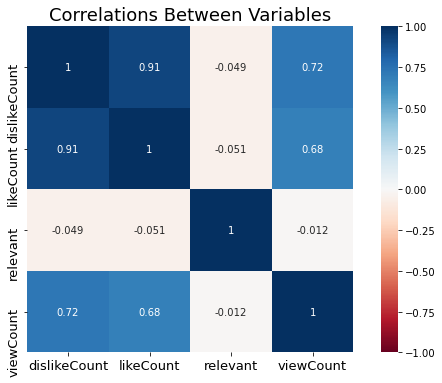

In [78]:
plt.figure(figsize = (10,6))
sns.heatmap(hw_data.corr(),annot=True,square=True,
            cmap='viridis',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

Is this something we can do with our data, considering the majority of our variables are categorical? If so, what value can this bring to our analyses/ what would be the motivation behind seeing if any variables are strongly correlated?

<AxesSubplot:>

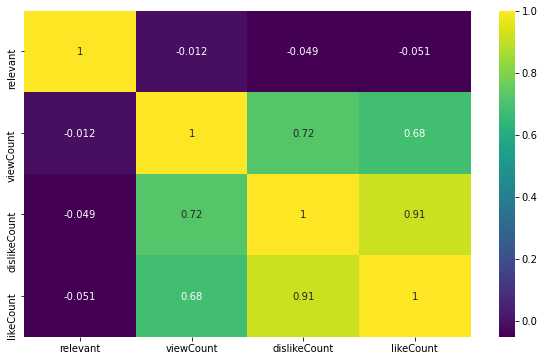

In [81]:
#Quality correlation matrix
k = 4 #number of variables for heatmap
cols = hw_data.corr().nlargest(k, 'relevant')['relevant'].index
cm = hw_data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')